In [1]:
import numpy as np
import scipy as sp
from scipy import optimize,special,integrate
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import copy

from lanczos_bin import *

from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
Ns = [200,700,2000,10000]
K_big = 151
K = 20

αs = np.full((len(Ns),K_big),np.nan)
βs = np.full((len(Ns),K_big),np.nan)
αs_ro = np.full((len(Ns),K_big),np.nan)
βs_ro = np.full((len(Ns),K_big),np.nan)

for i,N in enumerate(Ns):
    np.random.seed(0)
    v = np.random.randn(N)
    v /= np.linalg.norm(v)

    A_full = GOE_tridiag_model(N,N)
    Λ = sp.linalg.eigvalsh_tridiagonal(A_full.diagonal(),A_full.diagonal(1))
    A = sp.sparse.spdiags(Λ,0,N,N)

    Q,(αs[i],βs[i]) = lanczos_reorth(A.astype(np.single),v,K_big,0)
    Q,(αs_ro[i],βs_ro[i]) = lanczos_reorth(A.astype(np.longdouble),v.astype(np.longdouble),K_big,K_big)

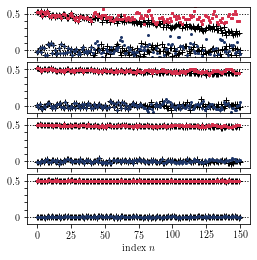

In [4]:
fig,axs = plt.subplots(len(Ns),1,figsize=(4,4),sharex=True,sharey=True)
plt.subplots_adjust(hspace=.1)

for i,N in enumerate(Ns):
    axs[i].axhline(0.5,lw=1,ls=':',color='k')
    axs[i].axhline(0,lw=1,ls=':',color='k')

    axs[i].plot(αs_ro[i],ls='None',marker='+',ms=6,color='k',label=r'$\alpha_i$')
    axs[i].plot(αs[i],ls='None',marker='o',ms=2,color=c1,label=r'$\overline{\alpha}_i$')

    axs[i].plot(βs_ro[i,:K_big-1],ls='None',marker='+',ms=6,color='k',label=r'$\beta_i$')
    axs[i].plot(βs[i,:K_big-1],ls='None',marker='s',ms=2,color=c3,label=r'$\overline{\beta}_i$')



axs[i].set_ylim(-.1,.6)
axs[i].set_yticks([0,.1,.2,.3,.4,.5])
axs[i].set_yticklabels([0,'','','','',.5])
axs[i].set_xlabel('index $n$')

plt.savefig('imgs/motivating_coeff_scale.pdf')

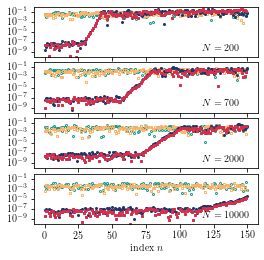

In [5]:
fig,axs = plt.subplots(len(Ns),1,figsize=(4,4),sharex=True,sharey=True)
plt.subplots_adjust(hspace=.1)

for i,N in enumerate(Ns):

    axs[i].text(.75,.1,f'$N = {N}$',ha='left', va='bottom', transform=axs[i].transAxes)

    axs[i].plot(np.abs(αs[i]),ls='None',marker='o',fillstyle='none',ms=2,color=c2,label=r'$|\alpha_i - \overline{\alpha}_i|$')
    axs[i].plot(np.abs(βs[i]-1/2)[:K_big-1],ls='None',marker='s',fillstyle='none',ms=2,color=c5,label=r'$|\beta_i - \overline{\beta}_i|$')

    axs[i].plot(np.abs(αs[i]-αs_ro[i]),ls='None',marker='o',ms=2,color=c1,label=r'$|\alpha_i - \overline{\alpha}_i|$')
    axs[i].plot(np.abs(βs[i]-βs_ro[i])[:K_big-1],ls='None',marker='s',ms=2,color=c3,label=r'$|\beta_i - \overline{\beta}_i|$')
    
axs[i].set_yscale('log')
axs[i].set_ylim([1e-10,1e0])
axs[i].set_yticks([1e-9,1e-7,1e-5,1e-3,1e-1])
axs[i].set_xlabel('index $n$')

plt.savefig('imgs/motivating_coeff_fe_scale.pdf')